##基礎演習S 後半第3回

NE21-1228F
鈴木　拓己

In [43]:
if(!require("magrittr")){install.packages("magrittr")}; library(magrittr)
if(!require("rvest")){install.packages("rvest")}; library(rvest)
if(!require("stringr")){install.packages("stringr")}; library(stringr)
if(!require("leaflet")){install.packages("leaflet")}; library(leaflet)
if(!require("htmlwidgets")){install.packages("htmlwidgets")}; library(htmlwidgets)
if(!require("maptools")){install.packages("maptools")}; library(maptools)
if(!require("classInt")){install.packages("classInt")}; library(classInt)
if(!require("RColorBrewer")){install.packages("RColorBrewer")}; library(RColorBrewer)
if(!require("rgdal")){install.packages("rgdal")}; library(rgdal)

In [44]:
# 「IPA」フォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicとする
par(family="IPAGothic")

In [45]:
# [1]	zipファイル解凍
system("apt -y install zip && unzip gadm36_JPN_shp.zip")    # zip解凍（含16ファイル）

OGR data source with driver: ESRI Shapefile 
Source: "/content/gadm36_JPN_1.shp", layer: "gadm36_JPN_1"
with 47 features
It has 10 fields


Object of class SpatialPolygonsDataFrame
Coordinates:
        min       max
x 122.93320 153.98694
y  24.04542  45.52279
Is projected: FALSE 
proj4string : [+proj=longlat +datum=WGS84 +no_defs]
Data attributes:
    GID_0              NAME_0             GID_1              NAME_1         
 Length:47          Length:47          Length:47          Length:47         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  VARNAME_1          NL_NAME_1            TYPE_1           ENGTYPE_1        
 Length:47          Length:47          Length:47          Length:47         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     CC_1              HASC_1         
 Length:47          Length:47         
 Class :character   Class :character  
 Mode  :character   Mode  :character  

[1] "Aichi"     "Akita"     "Aomori"    "Chiba"     "Ehime"     "Fukui"    
 [7] "Fukuoka"   "Fukushima" "Gifu"      "Gunma"     "Hiroshima" "Hokkaido" 
[13] "Hyōgo"     "Ibaraki"   "Ishikawa"  "Iwate"     "Kagawa"    "Kagoshima"
[19] "Kanagawa"  "Kochi"     "Kumamoto"  "Kyoto"     "Mie"       "Miyagi"   
[25] "Miyazaki"  "Nagano"    "Naoasaki"  "Nara"      "Niigata"   "Oita"     
[31] "Okayama"   "Okinawa"   "Osaka"     "Saga"      "Saitama"   "Shiga"    
[37] "Shimane"   "Shizuoka"  "Tochigi"   "Tokushima" "Tokyo"     "Tottori"  
[43] "Toyama"    "Wakayama"  "Yamagata"  "Yamaguchi" "Yamanashi"

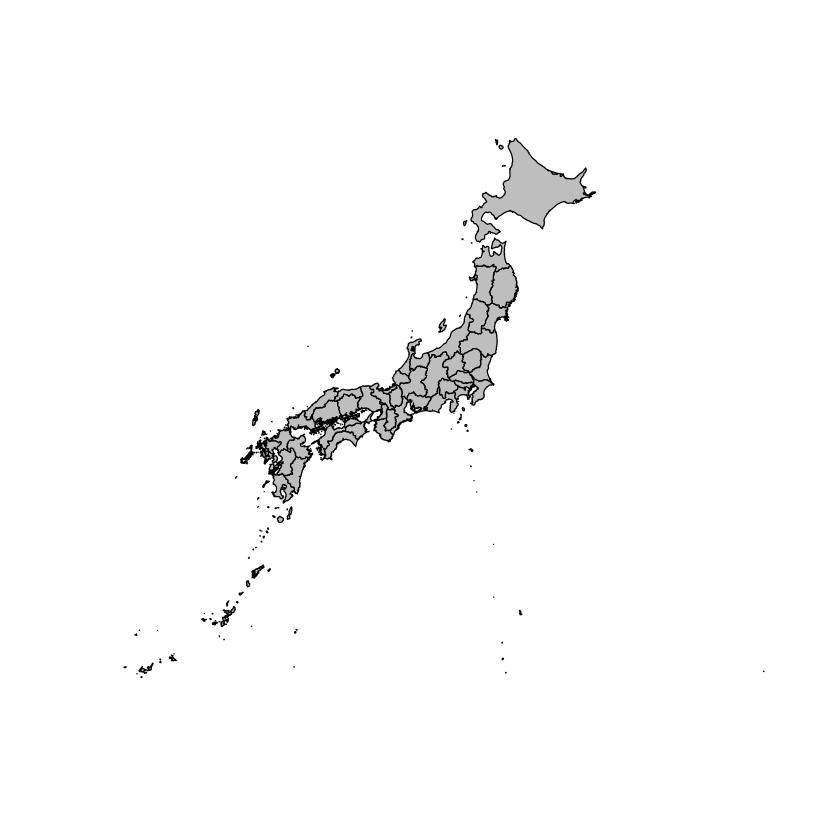

In [46]:
# [2]	地図データ（shapeファイル）の読み込み（都道府県のアルファベット順）
jpn <- readOGR("gadm36_JPN_1.shp", stringsAsFactors = FALSE)
plot(jpn, col="grey")				# col色でjpnのpolygonプロット
summary(jpn)					      # jpnのデータ部分の要約（NAME_1等を参照）
jpn@data$NAME_1	

##(1) 「3密」の「密集」という観点からすると,人口密度が高いほどリスクが高いということになりそうだが,実際にはどうなのだろうか.都道府県の人口密度のデータが以下のページにあるので,取得して地図に描きなさい。

In [47]:
url <- "https://uub.jp/pjn/pm20201001.html"
dat <- read_html(url)
#dat
XPath <-"//td[@class='al']"
place <- html_nodes(dat,xpath=XPath)	
#place
place_name <- html_text(place)
place_name <- place_name[1:47]
place_name

XPath2 <-"//td[2]"
pop <- html_nodes(dat,xpath=XPath2)	
pops <- html_text(pop)
pops <- pops[2:48]
pops <- gsub(",","",pops,perl=TRUE); 
pops <- as.numeric(pops);
pops

dataframe_pop <- data.frame(place_name,pops); dataframe_pop
colnames(dataframe_pop) <- c("都道府県","人口密度")

[1] "北海道"   "青森県"   "岩手県"   "宮城県"   "秋田県"   "山形県"  
 [7] "福島県"   "茨城県"   "栃木県"   "群馬県"   "埼玉県"   "千葉県"  
[13] "東京都"   "神奈川県" "新潟県"   "富山県"   "石川県"   "福井県"  
[19] "山梨県"   "長野県"   "岐阜県"   "静岡県"   "愛知県"   "三重県"  
[25] "滋賀県"   "京都府"   "大阪府"   "兵庫県"   "奈良県"   "和歌山県"
[31] "鳥取県"   "島根県"   "岡山県"   "広島県"   "山口県"   "徳島県"  
[37] "香川県"   "愛媛県"   "高知県"   "福岡県"   "佐賀県"   "長崎県"  
[43] "熊本県"   "大分県"   "宮崎県"   "鹿児島県" "沖縄県"

[1]   66.62  128.35   79.25  316.11   82.45  114.56  132.99  470.20  301.67
[10]  304.78 1933.98 1218.50 6402.64 3823.23  174.93  243.62  270.54  183.00
[19]  181.39  151.02  186.30  467.15 1458.02  306.56  351.87  558.97 4638.43
[28]  650.52  358.84  195.27  157.79  100.05  265.44  330.17  219.56  173.52
[37]  506.32  235.16   97.35 1029.82  332.46  317.68  234.61  177.24  138.27
[46]  172.88  642.90

place_name,pops
<chr>,<dbl>
北海道,66.62
青森県,128.35
岩手県,79.25
宮城県,316.11
秋田県,82.45
山形県,114.56
福島県,132.99
茨城県,470.20
栃木県,301.67


In [48]:
ej <- read.csv("prefecture.csv", as.is=T); ej	# アルファベット順（=地図Shapeファイル順）
id <- match(ej$日本語, dataframe_pop$都道府県); id	# 都道府県名でマッチング：データをShapeファイル順に
val <- dataframe_pop$人口密度[id]; val

英語,日本語
<chr>,<chr>
Aichi,愛知県
Akita,秋田県
Aomori,青森県
Chiba,千葉県
Ehime,愛媛県
Fukui,福井県
Fukuoka,福岡県
Fukushima,福島県
Gifu,岐阜県


[1] 23  5  2 12 38 18 40  7 21 10 34  1 28  8 17  3 37 46 14 39 43 26 24  4 45
[26] 20 42 29 15 44 33 47 27 41 11 25 32 22  9 36 13 31 16 30  6 35 19

[1] 1458.02   82.45  128.35 1218.50  235.16  183.00 1029.82  132.99  186.30
[10]  304.78  330.17   66.62  650.52  470.20  270.54   79.25  506.32  172.88
[19] 3823.23   97.35  234.61  558.97  306.56  316.11  138.27  151.02  317.68
[28]  358.84  174.93  177.24  265.44  642.90 4638.43  332.46 1933.98  351.87
[37]  100.05  467.15  301.67  173.52 6402.64  157.79  243.62  195.27  114.56
[46]  219.56  181.39

##plot Style=等間隔分類

style: equal
  one of 4,076,350,421 possible partitions of this variable into 11 classes
   [67,643)  [643,1219) [1219,1795) [1795,2371) [2371,2947) [2947,3523) 
         38           4           1           1           0           0 
[3523,4099) [4099,4675) [4675,5251) [5251,5827) [5827,6403] 
          1           1           0           0           1 

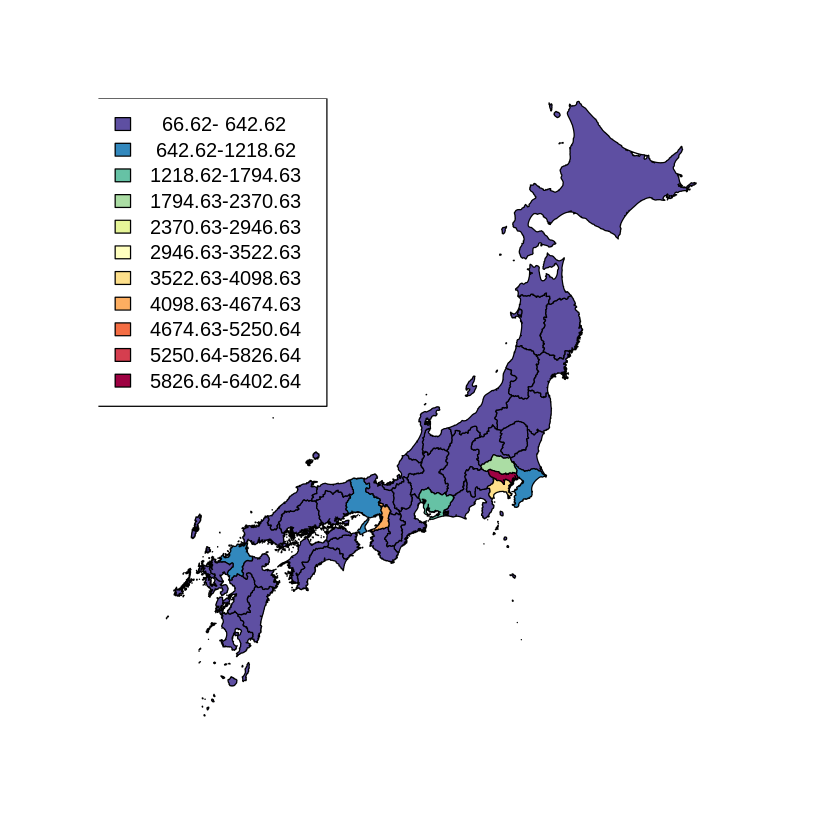

In [49]:
# [4] 色分けの級間隔(style)指定 ※ データと区間も
q_jpn <- classIntervals(val, n=11, style="equal", dataPrecision=0)	# 等間隔分類
q_jpn
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [5] カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorBin("Spectral", domain = val, bins = q_jpn$brks, reverse=T)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
xlim <- c(130,145); ylim <- c(30,45) 
plot(jpn, xlim=xlim, ylim=ylim, col=pal(val))	# 地図をプロット
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}
addleg(q=q_jpn, pal=pal, ns=2, x="topleft")

##plot Style=等量分類

style: quantile
  one of 4,076,350,421 possible partitions of this variable into 11 classes
   [67,103)   [103,143)   [143,175)   [175,186)   [186,236)   [236,302) 
          5           4           4           4           4           5 
  [302,322)   [322,409)   [409,613)  [613,1415) [1415,6403] 
          4           4           4           4           5 

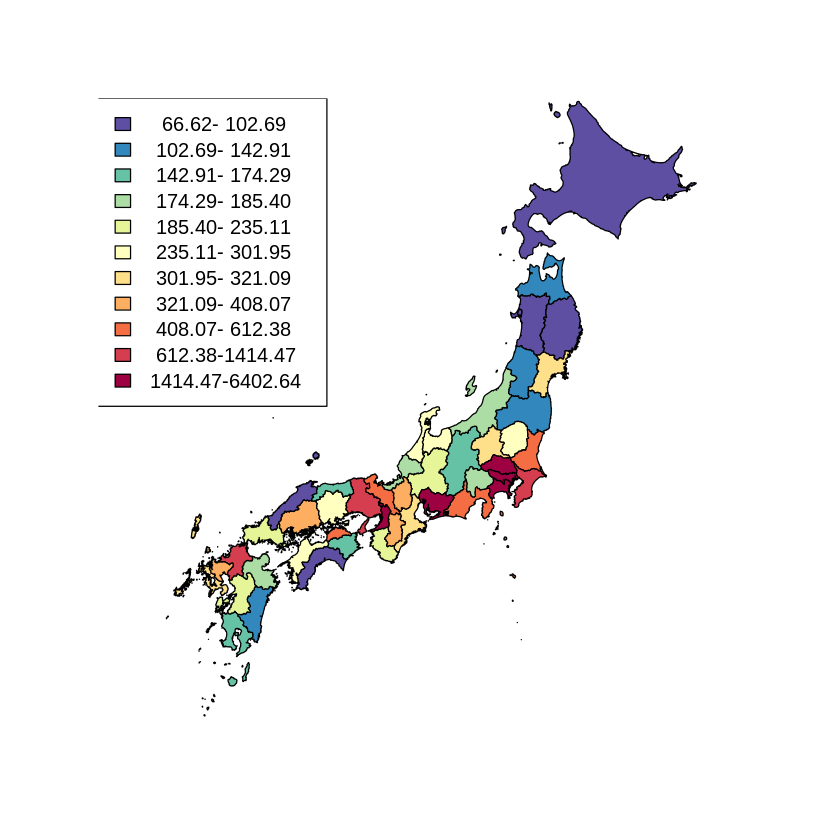

In [50]:
# [4] 色分けの級間隔(style)指定 ※ データと区間も
q_jpn <- classIntervals(val, n=11, style="quantile", dataPrecision=0)	# 等間隔分類
q_jpn
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [5] カラーパレットの作成　※palは関数（値を色に対応）
pal <- colorBin("Spectral", domain = val, bins = q_jpn$brks, reverse=T)
#－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－
# [6] 地図描画(1)（plot）
xlim <- c(130,145); ylim <- c(30,45) 
plot(jpn, xlim=xlim, ylim=ylim, col=pal(val))	# 地図をプロット
# 凡例付加
addleg <- function(q, pal, ns, x, cex=1, ncol=1){     # 関数定義
  a <- q$brks[-length(q$brks)] %>% round(ns) %>% format(nsmall=ns)
  b <- q$brks[-1] %>% round(ns) %>% format(nsmall=ns)
  leg <- paste0(a, "-", b)
  legend(x=x, fill=pal(q$brks), cex=cex, ncol=ncol, legend=leg)
}
addleg(q=q_jpn, pal=pal, ns=2, x="topleft")

###(2) 「総人口密度」と「10 万人当たり累計感染者数」との関係を調べよう.


In [51]:
library(rvest)
library(magrittr)

url <- "https://uub.jp/cvd/cvd2.html"
dat <- read_html(url)
#dat
XPath <-"//td[@class='al']/a"
place <- html_nodes(dat,xpath=XPath)	

place_name <- html_text(place)
place_name <- place_name[1:47]
place_name

XPath2 <-"//td[@class='bpdrr1']"
Cumulative_infect <- html_nodes(dat,xpath=XPath2)	


Cumulative_infect_num <- html_text(Cumulative_infect)
Cumulative_infect_num <- gsub(",","",Cumulative_infect_num,perl=TRUE);
Cumulative_infect_num <- as.integer(Cumulative_infect_num); Cumulative_infect_num



XPath3 <-"//td[10]"
Cumulative10_infect <- html_nodes(dat,xpath=XPath3)	

Cumulative10_infect_num <- html_text(Cumulative10_infect)
Cumulative10_infect_num <- Cumulative10_infect_num[2:48]
Cumulative10_infect_num <- gsub(",","",Cumulative10_infect_num,perl=TRUE);
Cumulative10_infect_num <- as.numeric(Cumulative10_infect_num); Cumulative10_infect_num


length(place_name)
length(Cumulative_infect_num)
length(Cumulative10_infect_num)

[1] "北海道"   "青森県"   "岩手県"   "宮城県"   "秋田県"   "山形県"  
 [7] "福島県"   "茨城県"   "栃木県"   "群馬県"   "埼玉県"   "千葉県"  
[13] "東京都"   "神奈川県" "新潟県"   "富山県"   "石川県"   "福井県"  
[19] "山梨県"   "長野県"   "岐阜県"   "静岡県"   "愛知県"   "三重県"  
[25] "滋賀県"   "京都府"   "大阪府"   "兵庫県"   "奈良県"   "和歌山県"
[31] "鳥取県"   "島根県"   "岡山県"   "広島県"   "山口県"   "徳島県"  
[37] "香川県"   "愛媛県"   "高知県"   "福岡県"   "佐賀県"   "長崎県"  
[43] "熊本県"   "大分県"   "宮崎県"   "鹿児島県" "沖縄県"

[1]  385433   65504   38709   95642   32368   31046   67438  166641   95015
[10]   99500  577304  470920 1626196  792262   76731   40933   61125   39826
[19]   35129   78748  109884  182358  580548   89270   96911  215772 1031159
[28]  451304   95896   45972   17440   22533  105886  171667   50488   25006
[37]   51627   46868   31515  457979   59702   68244  117321   60192   60422
[46]   96892  263168

[1]  7438.2  5363.5  3235.8  4176.4  3425.5  2943.5  3721.4  5842.7  4944.6
[10]  5165.3  7864.2  7498.1 11606.2  8577.6  3524.8  3991.9  5432.6  5238.8
[19]  4362.0  3873.1  5605.0  5056.4  7724.2  5085.4  6871.4  8424.1 11708.0
[28]  8307.4  7290.5  5032.4  3179.2  3389.4  5645.0  6176.6  3803.4  3512.9
[37]  5480.4  3548.5  4607.1  8939.0  7409.8  5263.1  6789.8  5404.4  5695.0
[46]  6147.7 17920.6

[1] 47

[1] 47

[1] 47

In [52]:
dataframe_Cumulative <- data.frame(place_name,Cumulative_infect_num); #dataframe_Cumulative
colnames(dataframe_Cumulative) <- c("都道府県","累計感染者数")
dataframe_Cumulative10 <- data.frame(place_name,Cumulative10_infect_num); #dataframe_Cumulative10
colnames(dataframe_Cumulative10) <- c("都道府県","ten万人当り累計感染者数")

dataframe_Cumulative <- dataframe_Cumulative[order(dataframe_Cumulative$累計感染者数 , decreasing=T),]
dataframe_Cumulative10 <- dataframe_Cumulative10[order(dataframe_Cumulative10$ten万人当り累計感染者数 , decreasing=T),]

In [53]:
ej <- read.csv("prefecture.csv", as.is=T); ej	# アルファベット順（=地図Shapeファイル順）
id1 <- match(ej$日本語, dataframe_Cumulative$都道府県); id1	# 都道府県名でマッチング：データをShapeファイル順に
id2 <- match(ej$日本語, dataframe_Cumulative10$都道府県); id2	# 都道府県名でマッチング：データをShapeファイル順に
val1 <- dataframe_Cumulative$累計感染者数[id1]; val1
val2 <- dataframe_Cumulative10$ten万人当り累計感染者数[id2]; val2

英語,日本語
<chr>,<chr>
Aichi,愛知県
Akita,秋田県
Aomori,青森県
Chiba,千葉県
Ehime,愛媛県
Fukui,福井県
Fukuoka,福岡県
Fukushima,福島県
Gifu,岐阜県


[1]  4 42 29  6 36 39  7 28 16 18 13  9  8 14 30 40 34 20  3 43 15 11 24 22 31
[26] 25 27 21 26 32 17 10  2 33  5 19 46 12 23 45  1 47 38 37 44 35 41

[1]  9 43 25 10 40 27  4 39 21 28 16 11  7 18 23 45 22 17  5 33 15  6 29 35 19
[26] 37 26 13 41 24 20  1  2 12  8 14 44 30 32 42  3 46 36 31 47 38 34

[1]  580548   32368   65504  470920   46868   39826  457979   67438  109884
[10]   99500  171667  385433  451304  166641   61125   38709   51627   96892
[19]  792262   31515  117321  215772   89270   95642   60422   78748   68244
[28]   95896   76731   60192  105886  263168 1031159   59702  577304   96911
[37]   22533  182358   95015   25006 1626196   17440   40933   45972   31046
[46]   50488   35129

[1]  7724.2  3425.5  5363.5  7498.1  3548.5  5238.8  8939.0  3721.4  5605.0
[10]  5165.3  6176.6  7438.2  8307.4  5842.7  5432.6  3235.8  5480.4  6147.7
[19]  8577.6  4607.1  6789.8  8424.1  5085.4  4176.4  5695.0  3873.1  5263.1
[28]  7290.5  3524.8  5404.4  5645.0 17920.6 11708.0  7409.8  7864.2  6871.4
[37]  3389.4  5056.4  4944.6  3512.9 11606.2  3179.2  3991.9  5032.4  2943.5
[46]  3803.4  4362.0

In [54]:
dataframe_Cumulative_pop <- data.frame(dataframe_pop$都道府県,Cumulative10_infect_num,dataframe_pop$`人口密度`); dataframe_Cumulative_pop

dataframe_pop.都道府県,Cumulative10_infect_num,dataframe_pop.人口密度
<chr>,<dbl>,<dbl>
北海道,7438.2,66.62
青森県,5363.5,128.35
岩手県,3235.8,79.25
宮城県,4176.4,316.11
秋田県,3425.5,82.45
山形県,2943.5,114.56
福島県,3721.4,132.99
茨城県,5842.7,470.20
栃木県,4944.6,301.67


####1 横軸を「総人口密度」,縦軸を「10 万人当たり累計感染者数」とする散布図を描きなさい.

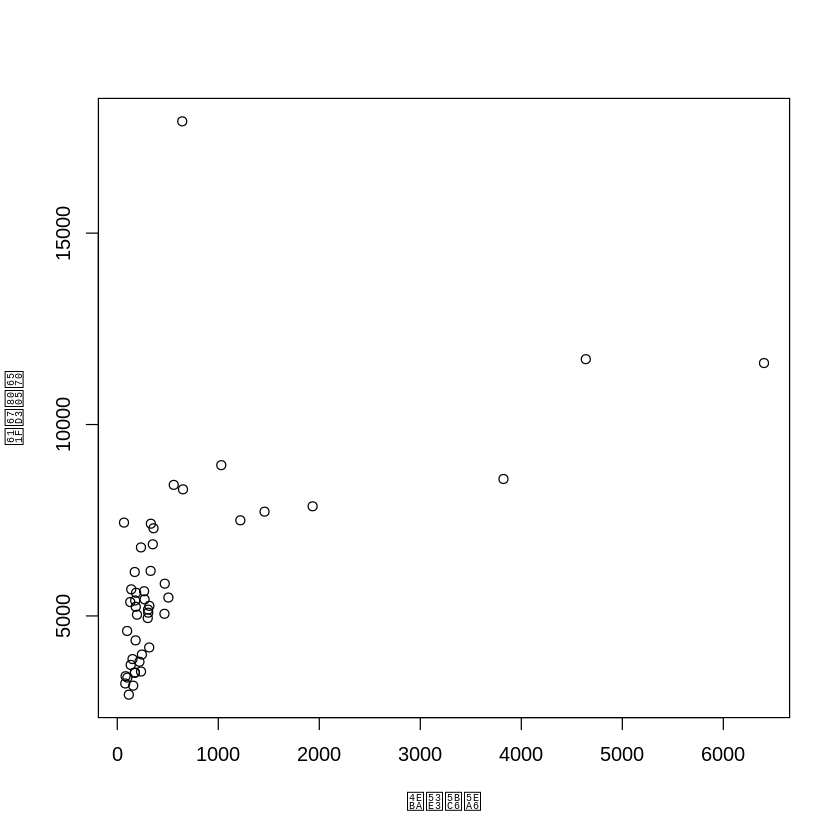

In [55]:
plot(dataframe_Cumulative_pop[,3],dataframe_Cumulative_pop[,2] , xlab="人口密度",ylab="感染者数")

####2.相関係数を求めなさい.

In [56]:
cor(dataframe_Cumulative_pop[,3],dataframe_Cumulative_pop[,2])

[1] 0.5688304

####3これらの結果について,簡潔にコメントを加えなさい.

相関係数では0.56とそこまでデータの慣例性が薄いが、散布図を確認すると外れ値を除けば比較的関連していることがわかる。つまり、人口密度と感染者数は例外を除き関連していると推測できる。例外は、沖縄であるため離島ならではの感染の拡大が起こっていると推測できる。